# Thematic Analysis of Climate Change News across Political Orientations

## 1. Importing

In [29]:
import pandas as pd
import plotly.express as px

## 2. Loading the corpus in a dataframe
_Note: when cloning this repository, it is essential to ensure having the `metadata.csv` file in the same directory as this notebook._

In [36]:
# Load data
df = pd.read_csv("metadata.csv")

df.head(6)

,id,title,date,outlet,language,orientation
0,Left.1,‘Unbelievably Vulnerable’: The Climate Challen...,"January 24, 2026",Inside Climate News,English,Left
1,Left.2,Greenland isn't the first territory America ha...,"January 24, 2026",USA Today News,English,Left
2,Left.3,Tropical Cyclone Luana forms into category one...,"January 24, 2026",ABC Australia,English,Left
3,Left.4,Millions of gallons of sewage spilled into the...,"January 24, 2026",The Washington Post,English,Left
4,Left.5,U.S. is canceling almost $30 billion in Biden-...,"January 24, 2026",Los Angeles Times,English,Left
5,Left.6,8600 premature deaths due to wood heating,"January 24, 2026",La Presse,French,Left


## 3. Distribution of Non-English articles (by language)

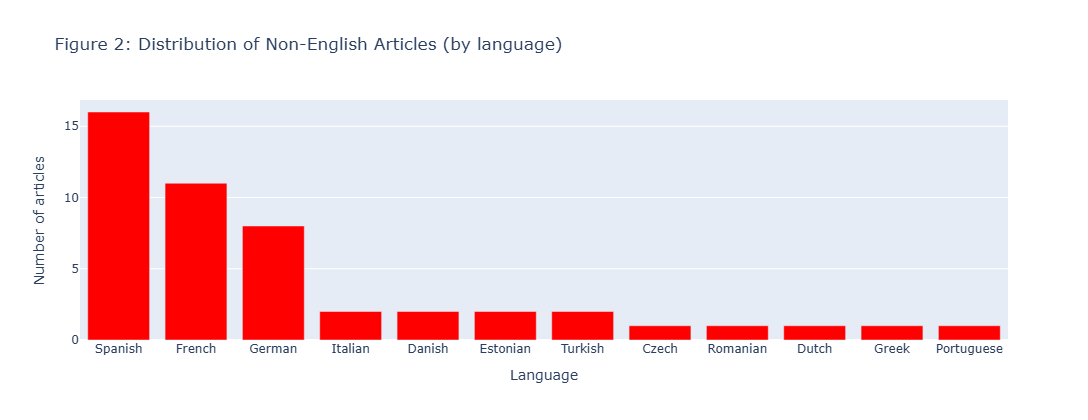

In [40]:
non_en = df[df["language"].astype(str).str.strip().str.lower() != "english"]

lang_counts = (
    non_en["language"]
    .astype(str).str.strip()
    .value_counts()
    .reset_index()
)
lang_counts.columns = ["language", "count"]

fig1 = px.bar(
    lang_counts,
    x="language",
    y="count",
    title="Figure 2: Distribution of Non-English Articles (by language)",
    width = 650,
    height = 420,
)

fig1.update_traces(marker_color="red")
fig1.update_layout(xaxis_title="Language", yaxis_title="Number of articles")

fig1.show()

## 4. Distribution of Non-English articles per orientation 

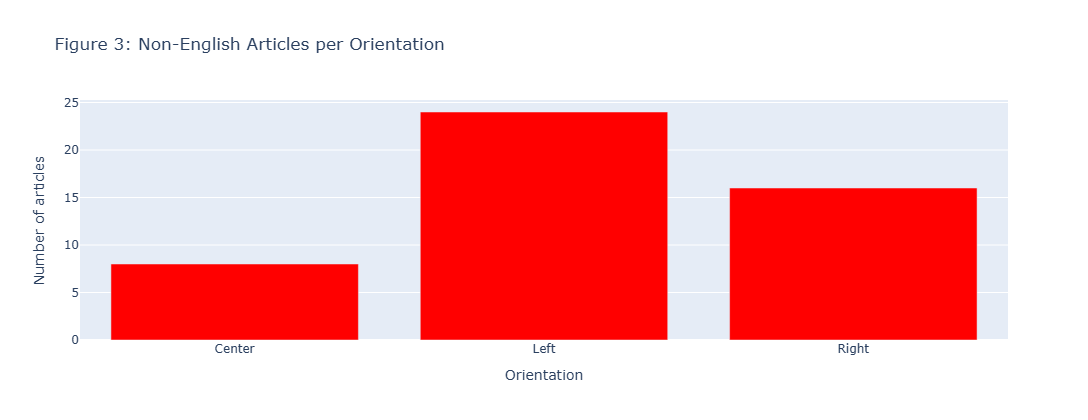

In [41]:
order = ["Center", "Left", "Right"]

orient_counts = (
    non_en["orientation"]
    .astype(str).str.strip()
    .value_counts()
    .reindex(order, fill_value=0)
    .reset_index()
)
orient_counts.columns = ["orientation", "count"]

fig2 = px.bar(
    orient_counts,
    x="orientation",
    y="count",
    title="Figure 3: Non-English Articles per Orientation",
    width=650,
    height=420
)

fig2.update_traces(marker_color="red")
fig2.update_layout(xaxis_title="Orientation", yaxis_title="Number of articles")

fig2.show()

## 5. Distribution of English versus Non-English Articles

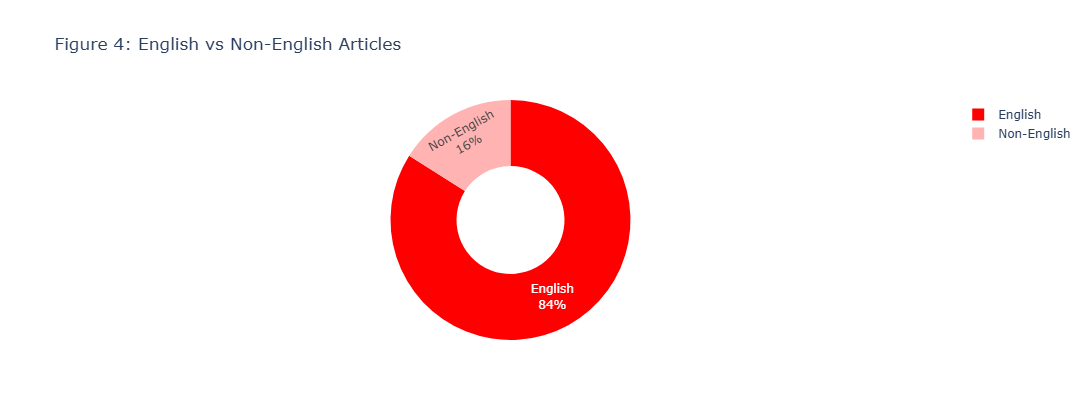

In [43]:
# Normalizing language values and classify
lang = df["language"].astype(str).str.strip().str.lower()
df["lang_group"] = lang.apply(lambda x: "English" if x == "english" else "Non-English")

counts = df["lang_group"].value_counts().reset_index()
counts.columns = ["lang_group", "count"]

fig = px.pie(
    counts,
    names="lang_group",
    values="count",
    title="Figure 4: English vs Non-English Articles",
    hole=0.45,
    width=420,
    height=420,
)

fig.update_traces(
    marker=dict(colors=["red", "#ffb3b3"]),  # English = red, Non-English = light red
    textinfo="percent+label")

fig.show()

## 6. Distribution of Top 5 Outlets per Political Orientation

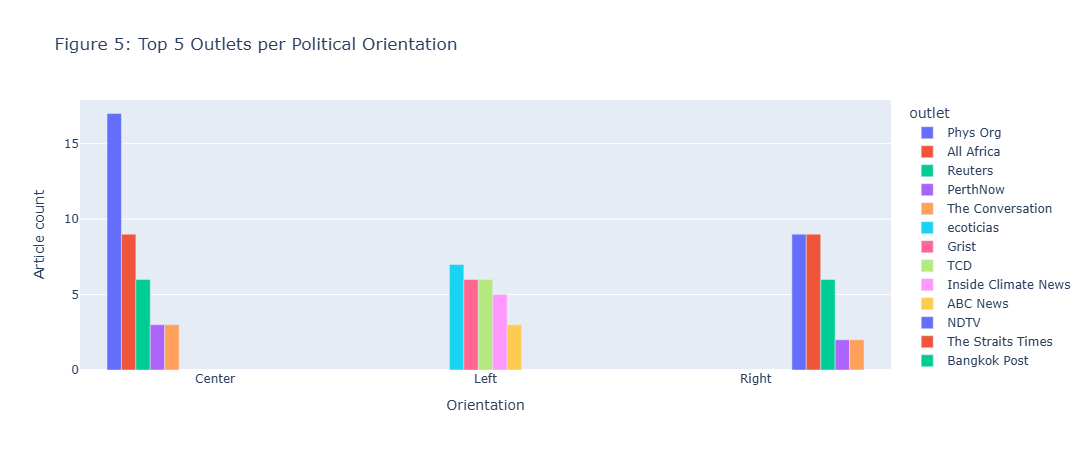

In [44]:
top_n = 5 

counts = (
    df.groupby(["orientation", "outlet"])
      .size()
      .reset_index(name="count")
)

top_outlets = (
    counts.sort_values(["orientation", "count"], ascending=[True, False])
          .groupby("orientation", as_index=False)
          .head(top_n)
)

fig = px.bar(
    top_outlets,
    x="orientation",
    y="count",
    color="outlet",
    barmode="group", 
    title=f"Figure 5: Top {top_n} Outlets per Political Orientation",
    width = 750,
    height = 450
)

fig.update_layout(xaxis_title="Orientation", yaxis_title="Article count")
fig.show()